In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import cv2
import numpy as np
import itertools
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,Activation,BatchNormalization
from sklearn import preprocessing

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers




In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dir=('/content/drive/MyDrive/dataseths/datasethappysad/train/')

In [5]:
classes=["happy1","sad1"]

In [6]:
training_data=[]
img_size=224 
def create_training_data():
  for category in classes:
    path=os.path.join(dir,category)
    class_num=classes.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass 

In [7]:
create_training_data()

In [8]:
print(len(training_data))

3909


In [9]:
import random
random.shuffle(training_data)

In [10]:
x=[] #feature/data
y=[] #label

for features,label in training_data:
  
  x.append(features)
  y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3) ##converting it to 4 dimensions  
y=np.array(y)

In [11]:
x=x/255.0

In [12]:
classes1=["H1","S1"]

In [13]:
dir1=('/content/drive/MyDrive/dataset/train/')

In [14]:
test_data=[]
img_size=224 
def create_test_data():
  for category in classes1:
    path=os.path.join(dir1,category)
    class_num=classes1.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        test_data.append([new_array, class_num])
      except Exception as e:
        pass 

In [15]:
create_test_data()

In [16]:
temp1=np.array(test_data)

<ipython-input-16-3bdf79796c9f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp1=np.array(test_data)


In [17]:
import random
random.shuffle(test_data)

In [18]:
x1=[] #feature/data
y1=[] #label

for features,label in test_data:
  
  x1.append(features)
  y1.append(label)

a=np.array(x1)

In [19]:
a=a/255.0

In [20]:
y1=np.array(y1)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 20,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator()

In [22]:
batch_size=10

# train_generator = train_datagen.flow(a, y1, batch_size=batch_size)
# valid_generator = valid_datagen.flow(x, y, batch_size=batch_size)

In [23]:
def build_network():
    input_layer = Input(shape=(224, 224, 3))
    x = Conv2D(filters=32,
               kernel_size=(3, 3),
               padding='same',
               strides=(1, 1))(input_layer)
    x = ReLU()(x)
    x = Dropout(rate=0.5)(x)

    x = Flatten()(x)
    x = Dense(units=2)(x)  
    output = Softmax()(x)

    model = Model(inputs=input_layer, outputs=output)
    return model


In [24]:
model = build_network()

In [25]:
epochs = 50
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#CategoricalCrossentropy(from_logits=True)

In [26]:
# for iteration in train_generator:
#     print(iteration)
#     break

In [27]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              min_delta=0, 
                                              patience=5, 
                                              verbose=0,
                                              mode='auto', 
                                              baseline=None, 
                                              restore_best_weights=False
                                             )

In [28]:
epochs = 50
history = model.fit(x, y, validation_data=(a, y1), epochs=epochs, callbacks=[early_stop])

Epoch 1/50
123/123 [==============================] - 15s 53ms/step - loss: 4.8466 - accuracy: 0.5426 - val_loss: 0.6586 - val_accuracy: 0.6380
Epoch 2/50
123/123 [==============================] - 6s 47ms/step - loss: 0.6752 - accuracy: 0.5718 - val_loss: 0.6700 - val_accuracy: 0.6068
Epoch 3/50
123/123 [==============================] - 6s 47ms/step - loss: 0.6550 - accuracy: 0.6058 - val_loss: 0.6618 - val_accuracy: 0.6042
Epoch 4/50
123/123 [==============================] - 6s 46ms/step - loss: 0.6386 - accuracy: 0.6201 - val_loss: 0.6179 - val_accuracy: 0.6823
Epoch 5/50
123/123 [==============================] - 6s 46ms/step - loss: 0.6165 - accuracy: 0.6506 - val_loss: 0.6011 - val_accuracy: 0.6719
Epoch 6/50
123/123 [==============================] - 6s 46ms/step - loss: 0.6018 - accuracy: 0.6733 - val_loss: 0.5642 - val_accuracy: 0.7266
Epoch 7/50
123/123 [==============================] - 6s 47ms/step - loss: 0.5510 - accuracy: 0.7035 - val_loss: 0.6075 - val_accuracy: 0.664

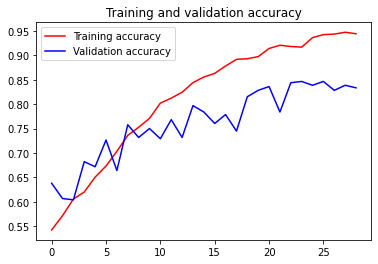

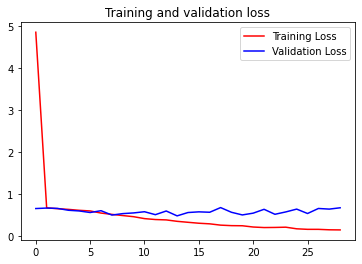

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
score = model.evaluate(a, y1, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8333333134651184


In [31]:
score = model.evaluate(a, y1, verbose=0)
print('Test loss:', score[0])

Test loss: 0.676662266254425
